In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
from tensorflow import keras

%matplotlib inline
np.random.seed(1)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

In [0]:
import cnn_utils

In [0]:
train_dataset = h5py.File('/content/drive/My Drive/Colab Notebooks/train_signs.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) #train set 
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) #train set labels

test_dataset = h5py.File('/content/drive/My Drive/Colab Notebooks/test_signs.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) #test set
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

In [0]:
train_set_x_orig.shape

(1080, 64, 64, 3)

In [0]:
train_set_y_orig.shape

(1080,)

In [0]:
test_set_x_orig.shape

(120, 64, 64, 3)

In [0]:
test_set_y_orig.shape

(120,)

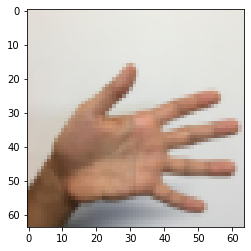

In [0]:
color1 = train_set_x_orig[0]
plt.imshow(color1, cmap=plt.get_cmap('gray'))
plt.show()

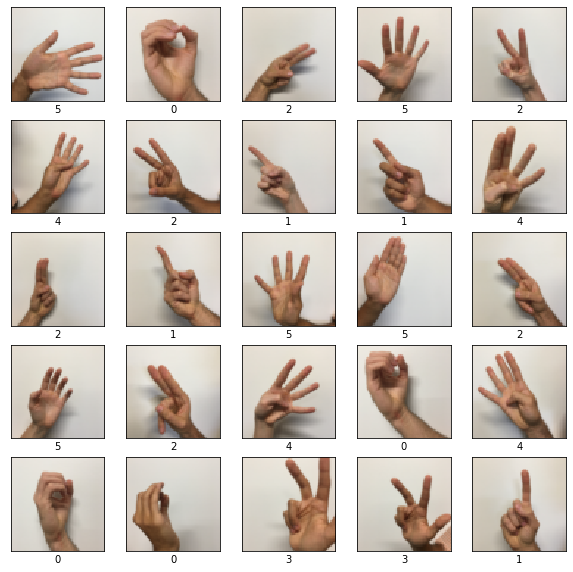

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_set_x_orig[i], cmap="gray")
    plt.xlabel(train_set_y_orig[i])
plt.show()

In [0]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
    # ITU-R 601-2 LUMA TRANSFORM

In [0]:
train_images = []
for i in train_set_x_orig :
  train_images.append(rgb2gray(i))

test_images = []
for i in test_set_x_orig :
  test_images.append(rgb2gray(i))

train_images = np.array(train_images)
test_images = np.array(test_images)

In [0]:
print(train_images.shape)
print(test_images.shape)

(1080, 64, 64)
(120, 64, 64)


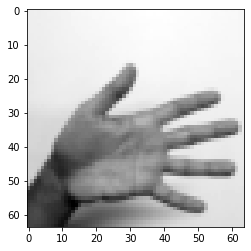

In [0]:
plt.imshow(train_images[0], cmap=plt.get_cmap('gray'))
plt.show()

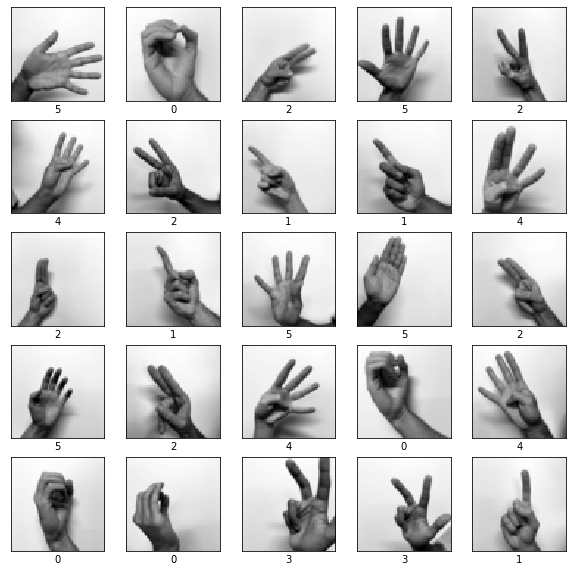

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap="gray")
    plt.xlabel(train_set_y_orig[i])
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(64, 64)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_set_y_orig, epochs=100)

Train on 1080 samples
Epoch 1/100
1080/1080 [==============================] - 1s 525us/sample - loss: 2.3860 - acc: 0.2009
Epoch 2/100
1080/1080 [==============================] - 0s 207us/sample - loss: 1.7165 - acc: 0.2519
Epoch 3/100
1080/1080 [==============================] - 0s 185us/sample - loss: 1.6879 - acc: 0.2870
Epoch 4/100
1080/1080 [==============================] - 0s 180us/sample - loss: 1.5380 - acc: 0.3648
Epoch 5/100
1080/1080 [==============================] - 0s 178us/sample - loss: 1.4981 - acc: 0.3833
Epoch 6/100
1080/1080 [==============================] - 0s 178us/sample - loss: 1.4262 - acc: 0.4500
Epoch 7/100
1080/1080 [==============================] - 0s 189us/sample - loss: 1.3848 - acc: 0.4722
Epoch 8/100
1080/1080 [==============================] - 0s 197us/sample - loss: 1.3436 - acc: 0.4944
Epoch 9/100
1080/1080 [==============================] - 0s 203us/sample - loss: 1.2660 - acc: 0.5444
Epoch 10/100
1080/1080 [==============================] - 0s

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_set_y_orig, verbose=2)

print('\nTest accuracy:', test_acc)

120/120 - 0s - loss: 0.6469 - acc: 0.7583

Test accuracy: 0.7583333


In [0]:
pred = model.predict(test_images)

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap="gray")

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Pred: {} Conf: {:2.0f}% (True: {})".format(predicted_label,
                                100*np.max(predictions_array),
                                test_set_y_orig[i]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(6))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

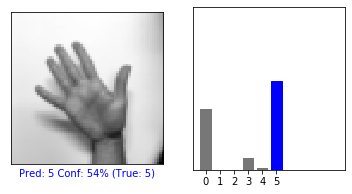

In [0]:
i = 3
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred[i], test_set_y_orig, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred[i],  test_set_y_orig)
plt.show()